In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('dark_background')

In [2]:
segment = gpd.read_file('segments_geometry.geojson')
segment.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   segment_id  792 non-null    object  
 1   road_name   792 non-null    object  
 2   geometry    792 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 18.7+ KB


In [3]:
invalid_geom = segment[~segment.geometry.is_valid]
nan_geom = segment[segment.geometry.isna()]

print("Invalid Geometries:", len(invalid_geom))
print("NaN Geometries:", len(nan_geom))


Invalid Geometries: 0
NaN Geometries: 0


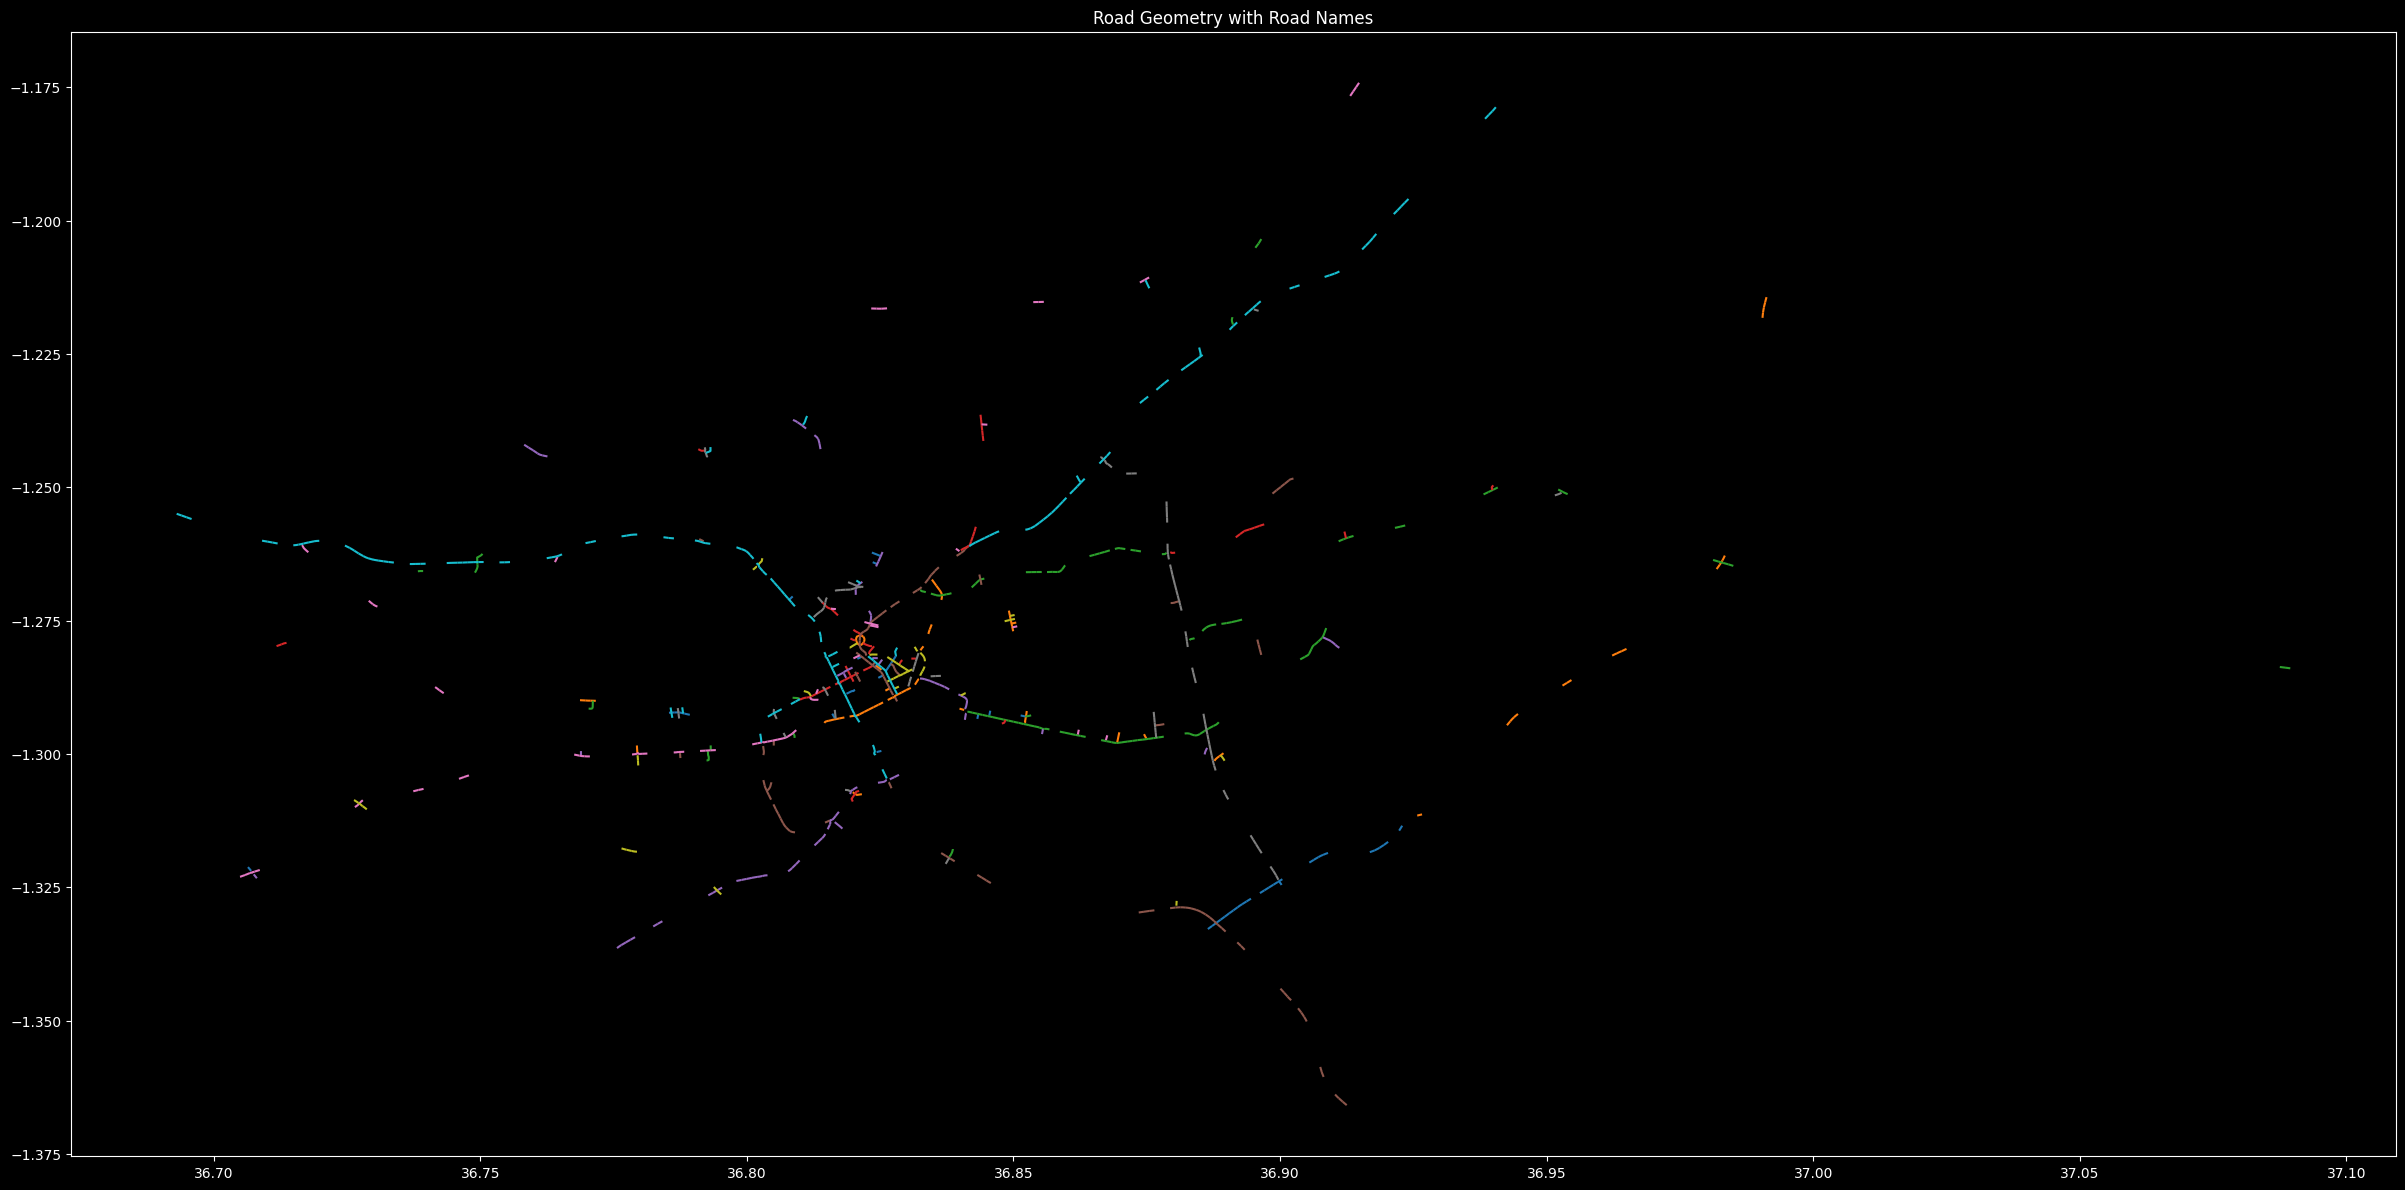

In [21]:
fig, ax = plt.subplots(figsize=(30,30))
segment.plot(column='road_name', legend=False, ax=ax)
plt.title("Road Geometry with Road Names")
plt.show()

In [5]:
train_data = pd.read_csv('Train.csv')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6318 entries, 0 to 6317
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   uid        6318 non-null   int64  
 1   datetime   6318 non-null   object 
 2   latitude   6318 non-null   float64
 3   longitude  6318 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 197.6+ KB


In [6]:
weather_info = pd.read_csv('Weather_Nairobi_Daily_GFS.csv')
weather_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  731 non-null    object 
 1   precipitable_water_entire_atmosphere  728 non-null    float64
 2   relative_humidity_2m_above_ground     728 non-null    float64
 3   specific_humidity_2m_above_ground     728 non-null    float64
 4   temperature_2m_above_ground           728 non-null    float64
 5   u_component_of_wind_10m_above_ground  728 non-null    float64
 6   v_component_of_wind_10m_above_ground  728 non-null    float64
dtypes: float64(6), object(1)
memory usage: 40.1+ KB


In [7]:
segment_info = pd.read_csv('Segment_info.csv')
segment_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535 entries, 0 to 1534
Columns: 228 entries, segment_id to 80_97_61_39_16
dtypes: float64(27), int64(200), object(1)
memory usage: 2.7+ MB


In [8]:
segment_info.columns

Index(['segment_id', 'side', '25_48', '79_76', '79_65', '79_39', '28_78_50',
       '55_90', '26_76', '92_30',
       ...
       '80_97_61_65_11', '80_97_61_65_12', '80_97_61_65_15', '80_97_61_65_16',
       '80_97_61_39_0', '80_97_61_39_10', '80_97_61_39_11', '80_97_61_39_12',
       '80_97_61_39_15', '80_97_61_39_16'],
      dtype='object', length=228)

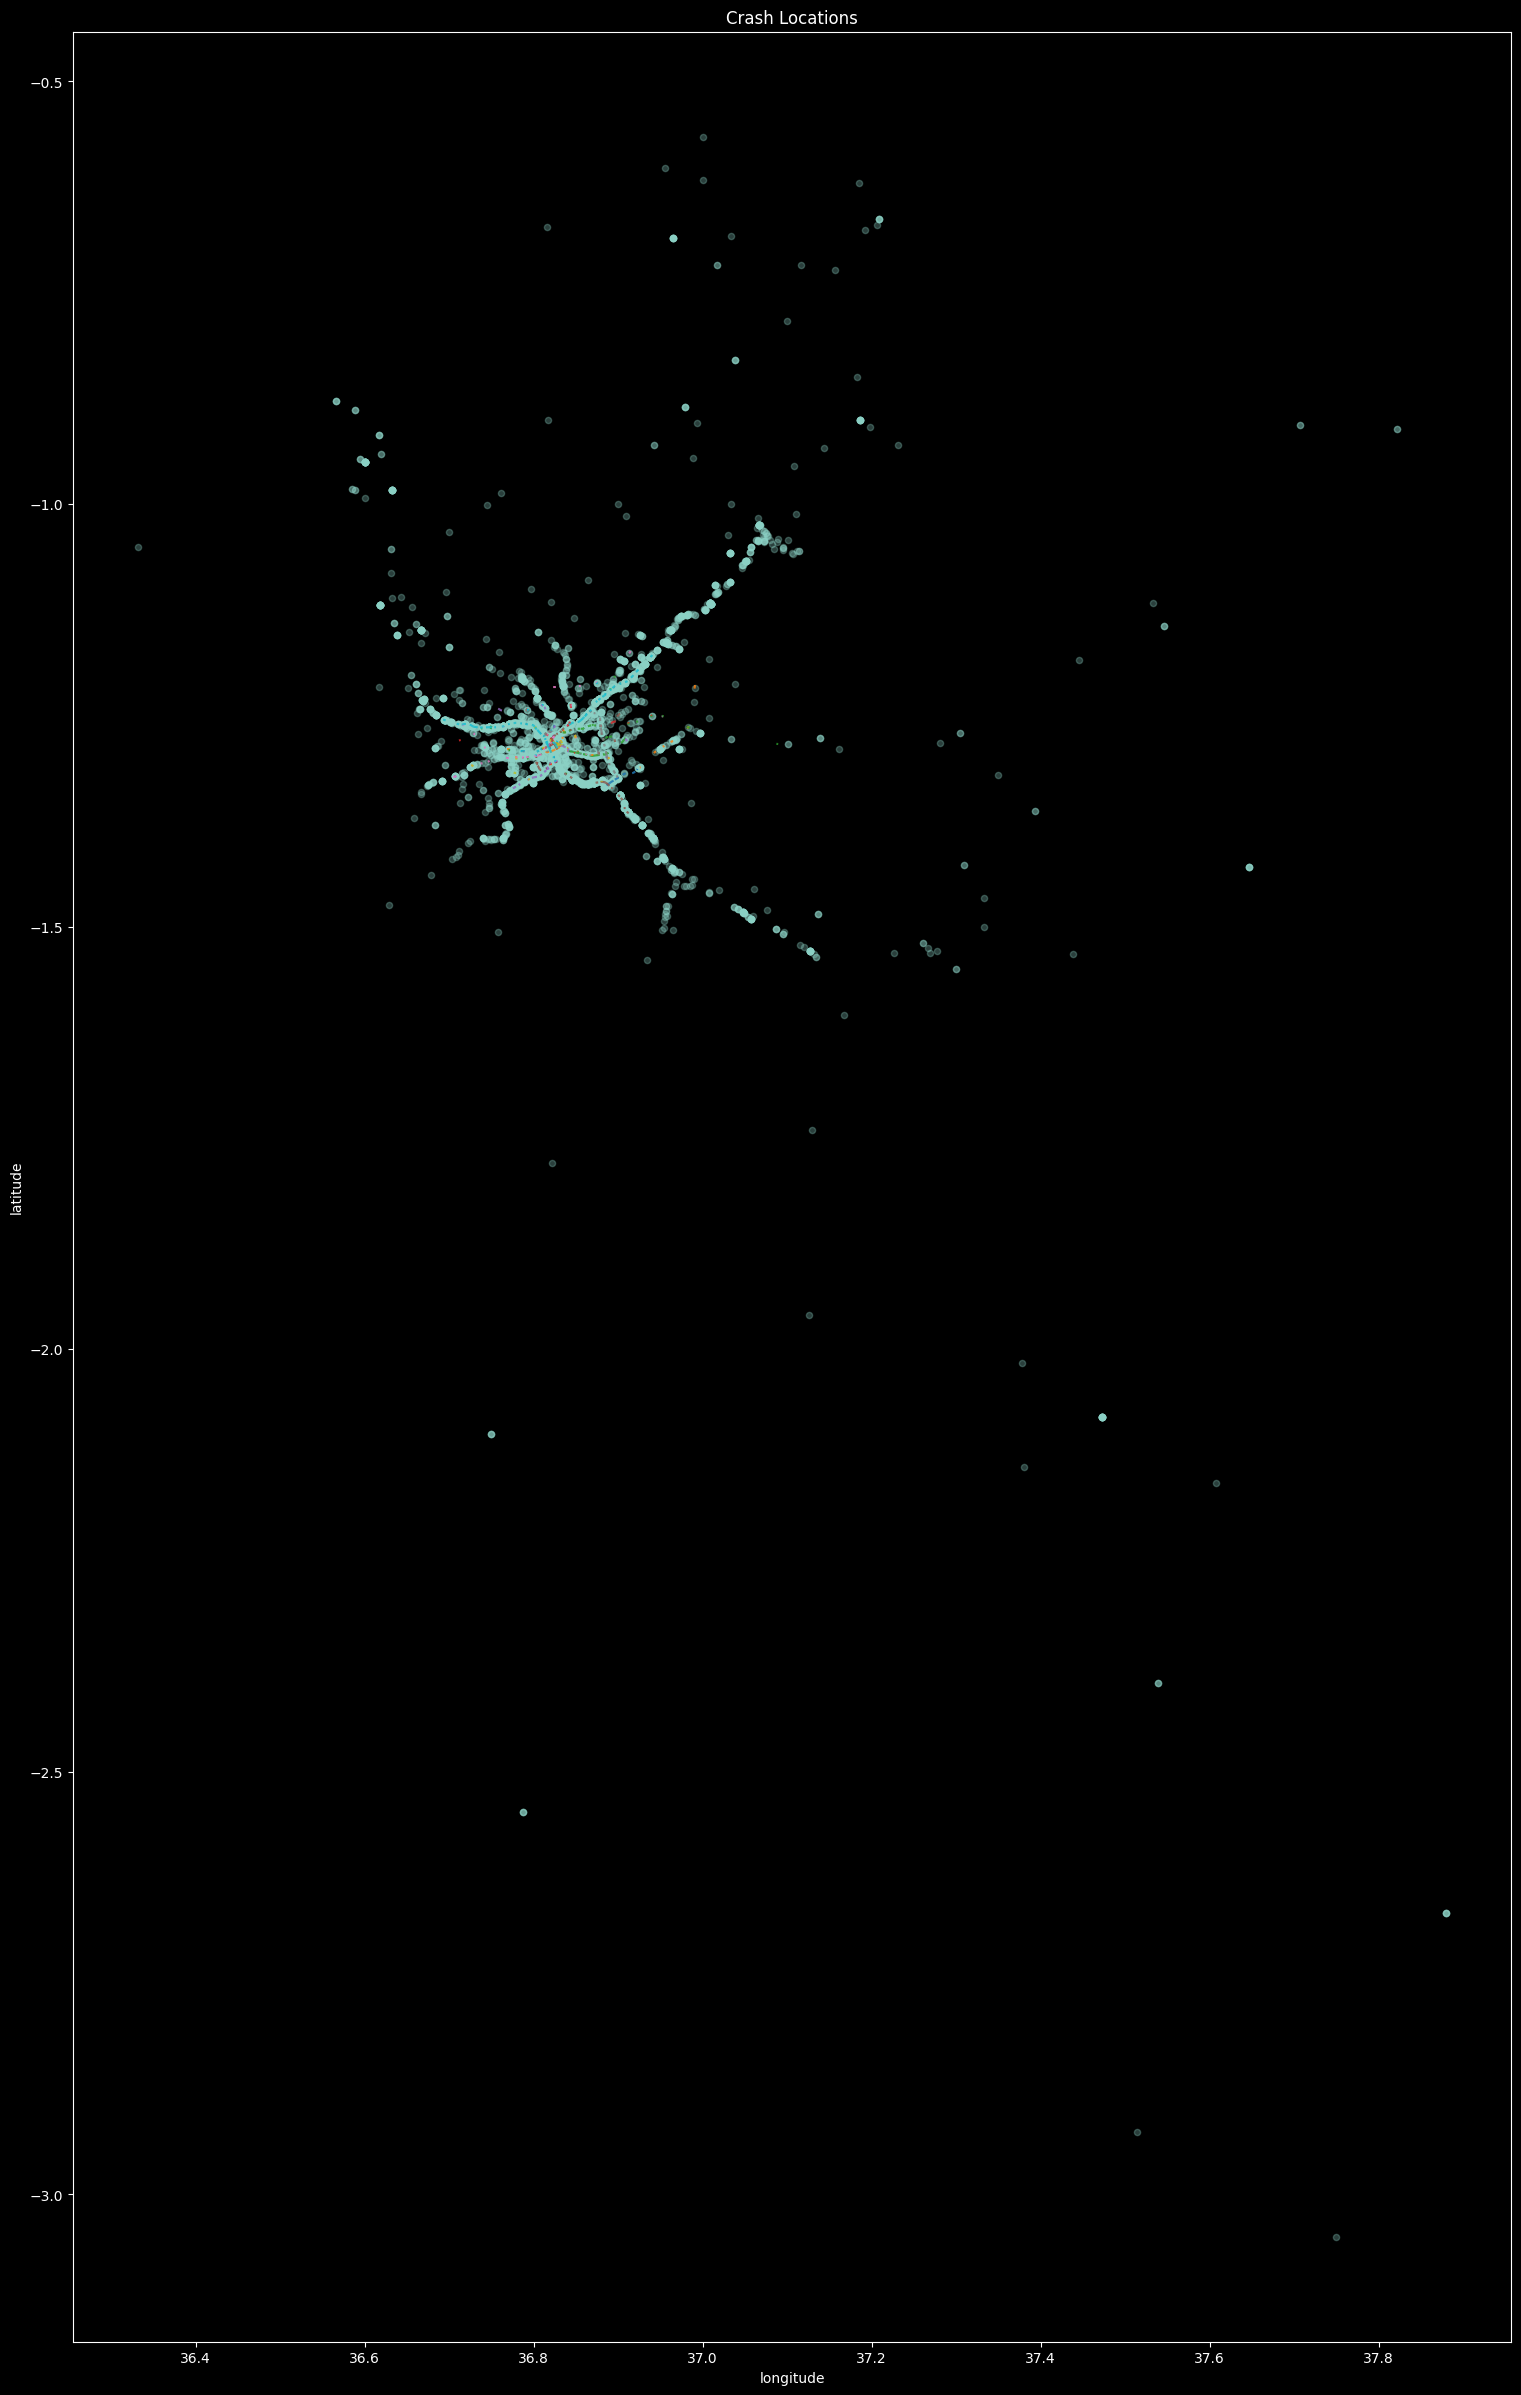

In [22]:
ax = segment.plot(column='road_name',legend=False,figsize=(30,30))
train_data.plot(x='longitude', y='latitude', kind='scatter',alpha = 0.3, title='Crash Locations',ax = ax)
plt.show()

In [10]:
weather_info.describe()

,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground
count,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000
mean,23.977231,83.160478,0.010955,15.175692,-1.907236,-1.128133
std,4.693146,9.084966,0.001326,1.127291,1.250924,1.118509
min,10.800000,42.200001,0.006380,11.749994,-5.880168,-3.796548
25%,20.700001,79.887714,0.010057,14.430894,-2.736363,-1.978961
50%,24.024831,85.626667,0.011251,15.231058,-1.953043,-1.084154
75%,27.500000,89.599998,0.011940,15.916383,-1.167893,-0.274010
max,34.000000,95.769302,0.013284,19.928125,3.478000,1.973149


In [11]:
segment

,segment_id,road_name,geometry
0,28_1,accra road-tertiary,"LINESTRING (36.82603 -1.28447, 36.82605 -1.284..."
1,137_1,accra road-tertiary,"LINESTRING (36.82656 -1.28371, 36.82658 -1.283..."
2,137_2,accra road-tertiary,"LINESTRING (36.82711 -1.28289, 36.82713 -1.282..."
3,1_1,airport north road-primary,"LINESTRING (36.88646 -1.33284, 36.88649 -1.332..."
4,1_2,airport north road-primary,"LINESTRING (36.88726 -1.33226, 36.88729 -1.332..."
...,...,...,...
787,243_8,thika road-primary,"LINESTRING (36.84285 -1.26037, 36.84281 -1.260..."
788,271_1,waiyaki way-trunk,"LINESTRING (36.72987 -1.26356, 36.72991 -1.263..."
789,271_2,waiyaki way-trunk,"LINESTRING (36.73084 -1.26374, 36.73089 -1.263..."
790,271_3,waiyaki way-trunk,"LINESTRING (36.73182 -1.26388, 36.73187 -1.263..."


In [12]:
segment.to_crs('epsg:4326')

,segment_id,road_name,geometry
0,28_1,accra road-tertiary,"LINESTRING (36.82603 -1.28447, 36.82605 -1.284..."
1,137_1,accra road-tertiary,"LINESTRING (36.82656 -1.28371, 36.82658 -1.283..."
2,137_2,accra road-tertiary,"LINESTRING (36.82711 -1.28289, 36.82713 -1.282..."
3,1_1,airport north road-primary,"LINESTRING (36.88646 -1.33284, 36.88649 -1.332..."
4,1_2,airport north road-primary,"LINESTRING (36.88726 -1.33226, 36.88729 -1.332..."
...,...,...,...
787,243_8,thika road-primary,"LINESTRING (36.84285 -1.26037, 36.84281 -1.260..."
788,271_1,waiyaki way-trunk,"LINESTRING (36.72987 -1.26356, 36.72991 -1.263..."
789,271_2,waiyaki way-trunk,"LINESTRING (36.73084 -1.26374, 36.73089 -1.263..."
790,271_3,waiyaki way-trunk,"LINESTRING (36.73182 -1.26388, 36.73187 -1.263..."


In [13]:
train_data

,uid,datetime,latitude,longitude
0,1,2018-01-01 00:25:46,-1.188850,36.931382
1,2,2018-01-01 02:02:39,-0.662939,37.208730
2,3,2018-01-01 02:31:49,-0.662939,37.208730
3,4,2018-01-01 03:04:01,-1.288087,36.826583
4,5,2018-01-01 03:58:49,-1.188850,36.931382
...,...,...,...,...
6313,6314,2019-06-29 18:52:44,-1.262271,36.726540
6314,6315,2019-06-30 09:57:44,-1.279468,36.790449
6315,6316,2019-06-30 12:02:14,-1.322109,36.825248
6316,6317,2019-06-30 16:59:14,-1.278589,36.816518


In [14]:
training_data = train_data.drop(columns=['uid','datetime'])

In [16]:
from sklearn.model_selection import train_test_split
X_train ,X_Test = train_test_split(training_data,test_size=0.2,random_state=42)

Use Agglomerative clustering to model the data

In [17]:
import tensorflow as tf

# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2,activation='linear')  # Output layer with 2 units for latitude and longitude
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the neural network
model.fit(X_train,X_train, epochs=200, batch_size=25,verbose=0)

# Extract features from intermediate layers
intermediate_layer_model = tf.keras.Model(inputs=model.input,
                                            outputs=model.layers[5].output)
features = intermediate_layer_model.predict(X_train)
features

2023-12-23 11:00:34.111942: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-23 11:00:34.161172: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-23 11:00:34.161217: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-23 11:00:34.162453: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-23 11:00:34.171330: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-23 11:00:34.172264: I tensorflow/core/platform/cpu_feature_guard.cc:1

158/158 [==============================] - 0s 2ms/step


array([[-1.2891803, 36.693386 ],
       [-0.9840665, 36.505783 ],
       [-1.2811675, 36.754833 ],
       ...,
       [-1.2891932, 36.689632 ],
       [-1.3042136, 36.741997 ],
       [-1.2889214, 36.69285  ]], dtype=float32)

In [69]:
features_df = pd.DataFrame(features.astype(np.float64),columns=['latitude','longitude'])
features_df

,latitude,longitude
0,-1.289180,36.693386
1,-0.984066,36.505783
2,-1.281168,36.754833
3,-1.290405,36.618042
4,-1.260071,36.772423
...,...,...
5049,-1.292059,36.645729
5050,-1.287837,36.739132
5051,-1.289193,36.689632
5052,-1.304214,36.741997


In [77]:
X_Test

,latitude,longitude
4082,-1.230255,36.841331
6241,-1.285870,36.823195
712,-1.281324,36.822648
3648,-1.149238,36.667043
2666,-1.329951,36.866519
...,...,...
1433,-1.395628,36.941025
292,-1.193348,36.839979
1142,-1.294000,36.851785
5004,-1.304789,36.826210


/home/roy/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


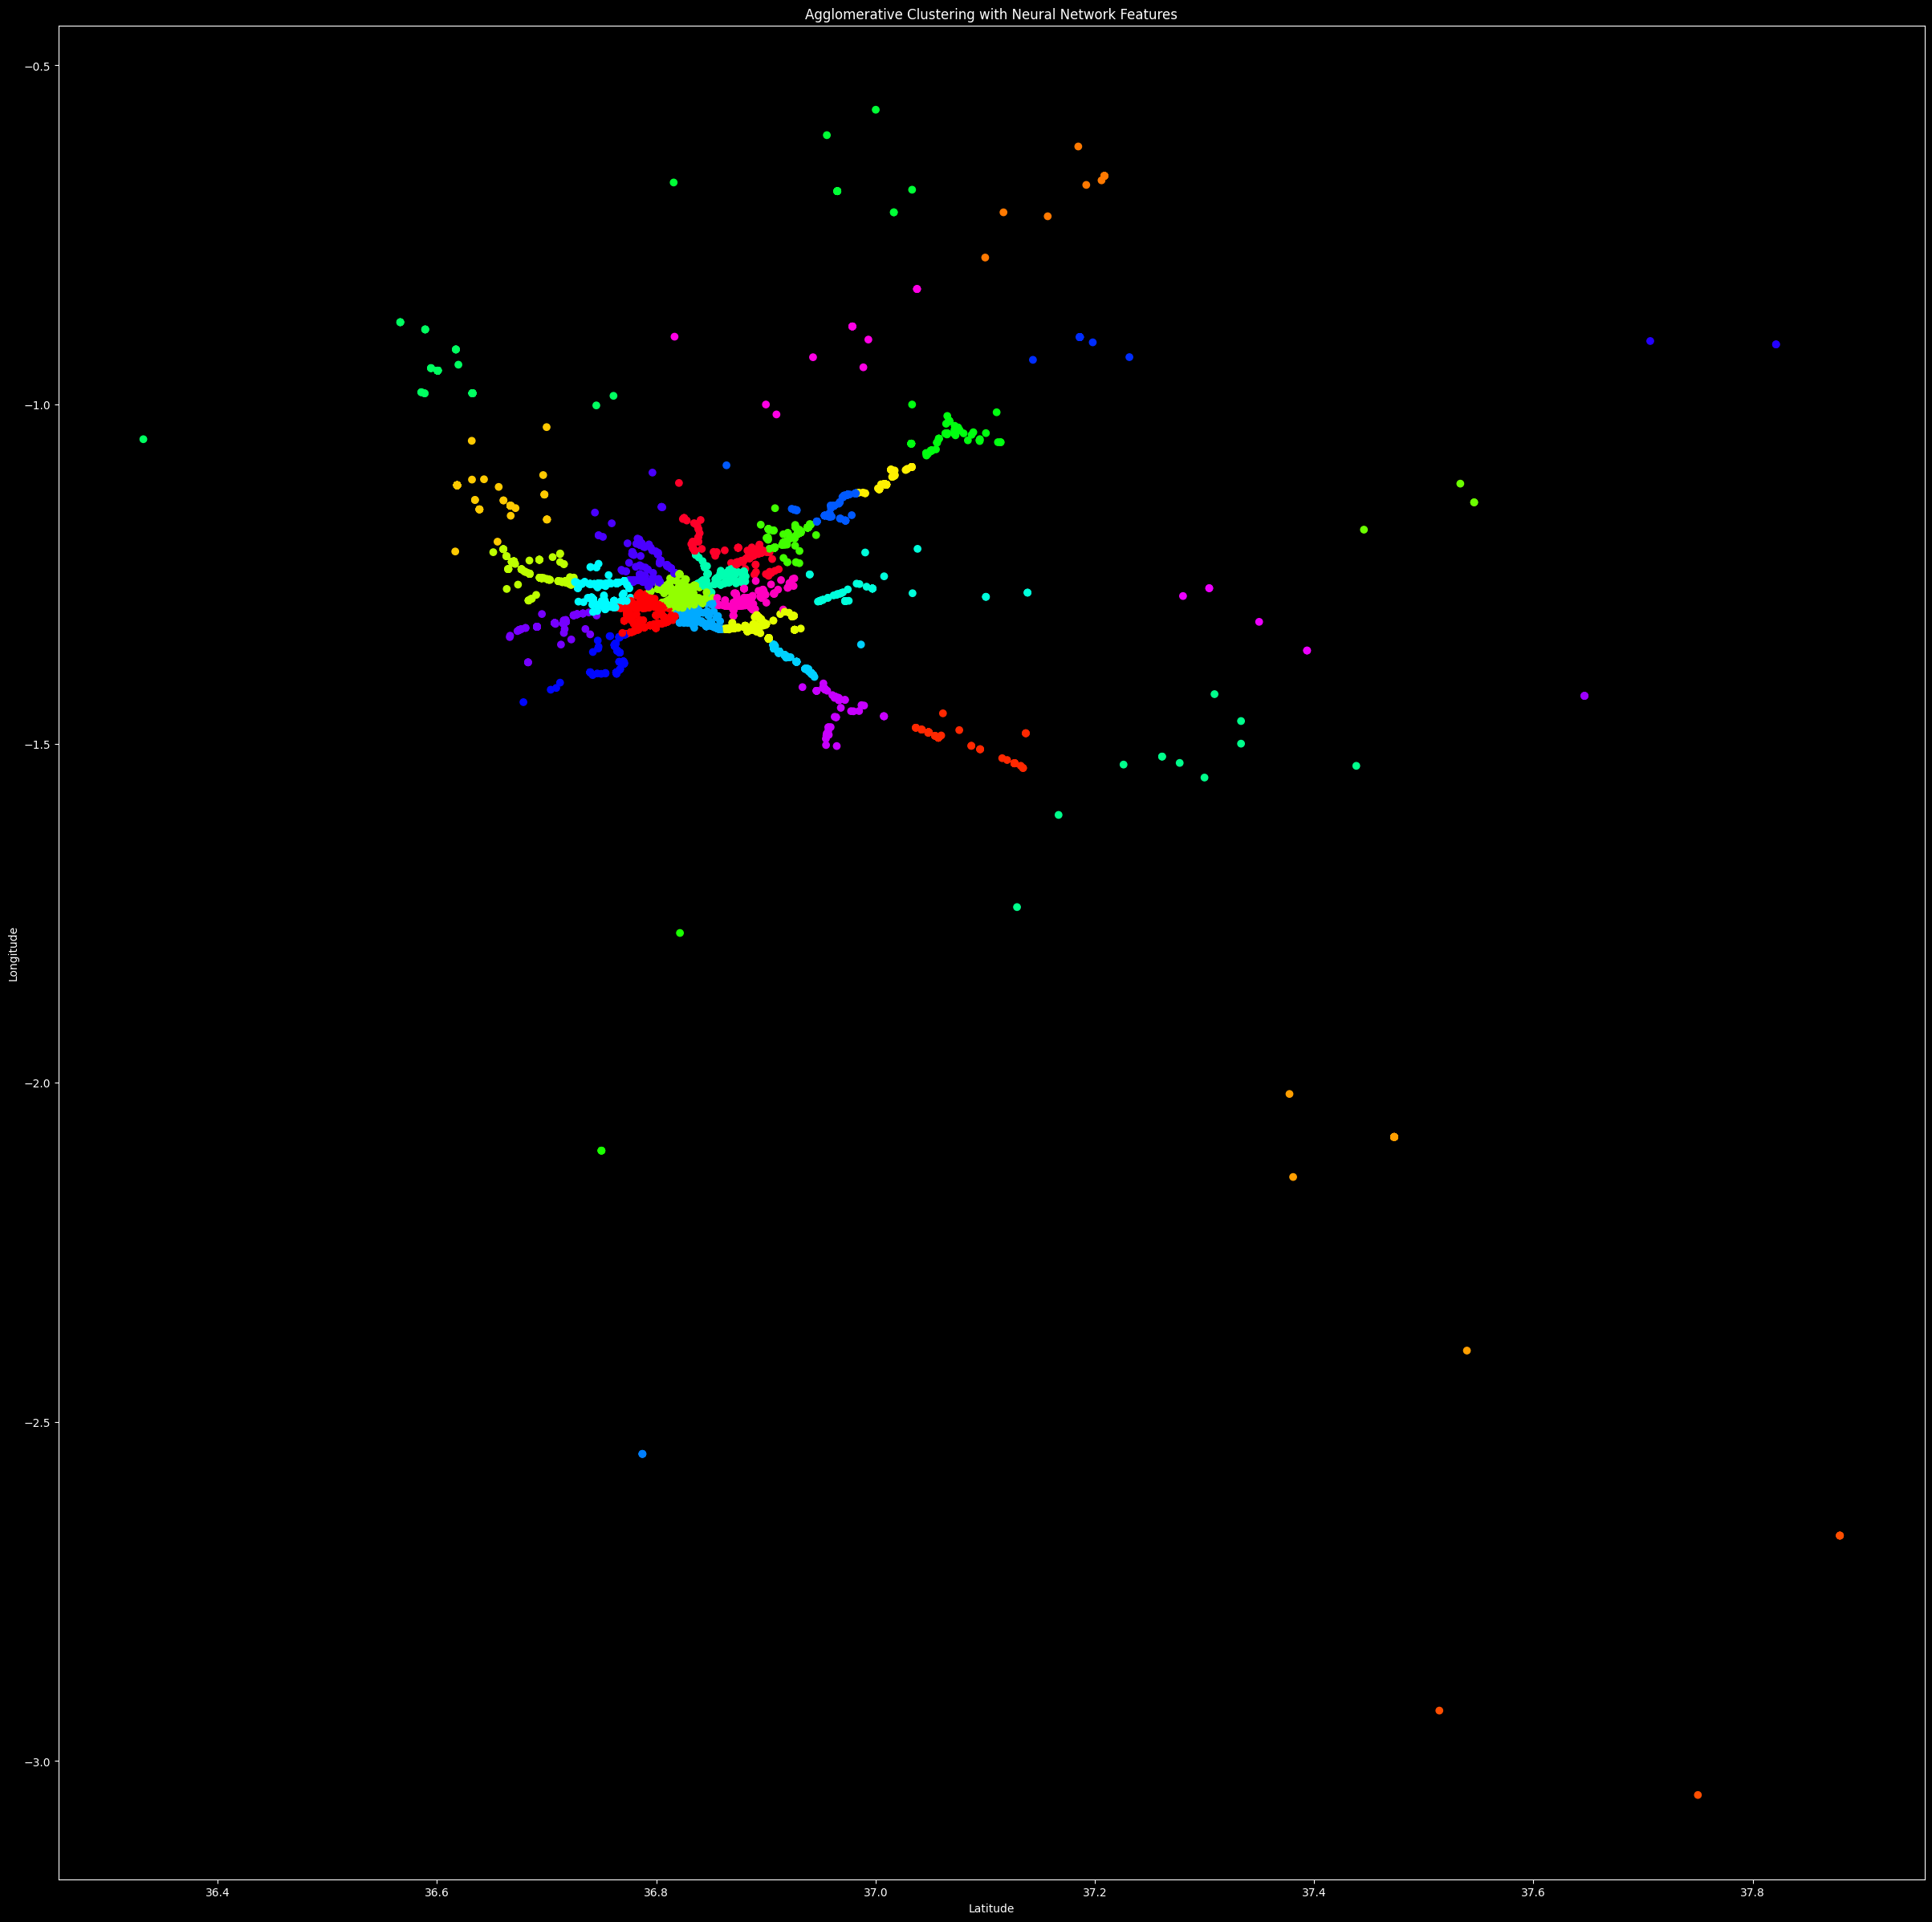

In [71]:
from sklearn.cluster import KMeans
# Apply hierarchical clustering
cluster = KMeans(n_clusters=35,random_state=42)
clusters = cluster.fit_predict(features_df)

plt.figure(figsize=(30,30))
plt.scatter(X_train['longitude'], X_train['latitude'], c=clusters, cmap='gist_rainbow')
plt.title('Agglomerative Clustering with Neural Network Features')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [70]:
features_df.dtypes , X_Test.dtypes

(latitude     float64
 longitude    float64
 dtype: object,
 latitude     float64
 longitude    float64
 dtype: object)

In [76]:
pred = cluster.predict(X_Test)
pred

array([12, 19, 19, ..., 19, 19, 12], dtype=int32)

In [79]:
import matplotlib.pyplot as plt
import numpy as np

def predict_clusters(cluster_pred, new_data):

    assigned_clusters = cluster_pred.predict(new_data)

    return assigned_clusters
new_data = pd.DataFrame({'latitude': [-1.230255],'longitude': [36.841331]})
new_data = new_data.astype(np.float64)
# Make predictions on new data
predicted_clusters = predict_clusters(cluster,new_data)

# Print the predicted clusters
predicted_clusters


array([12], dtype=int32)

In [82]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
silhouette_score = silhouette_score(X_train,clusters)
print(f"Silhouette score: {silhouette_score}")
calinski_harabasz_score = calinski_harabasz_score(X_train,clusters)
print(f"calinski harabasz score: {calinski_harabasz_score}")
davies_bouldin_score = davies_bouldin_score(X_train,clusters)
print(f"davies bouldin score: {davies_bouldin_score}")

Silhouette score: 0.48741154167534273
calinski harabasz score: 6680.480650342498
davies bouldin score: 0.5418668234726471


QhullError: QH6154 Qhull precision error: Initial simplex is flat (facet 1 is coplanar with the interior point)

While executing:  | qhull i Qt
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 120313540  incidence  Qtriangulate  _pre-merge  _zero-centrum
  _max-width 0.32  Error-roundoff 2.6e-14  _one-merge 1.3e-13
  _near-inside 6.4e-13  Visible-distance 5.1e-14  U-max-coplanar 5.1e-14
  Width-outside 1e-13  _wide-facet 3.1e-13  _maxoutside 1.5e-13

The input to qhull appears to be less than 2 dimensional, or a
computation has overflowed.

Qhull could not construct a clearly convex simplex from points:
- p1(v3):    37  -2.1
- p2(v2):    37  -1.8
- p0(v1):    37  -2.1

The center point is coplanar with a facet, or a vertex is coplanar
with a neighboring facet.  The maximum round off error for
computing distances is 2.6e-14.  The center point, facets and distances
to the center point are as follows:

center point    36.77   -1.993

facet p2 p0 distance= -7.2e-15
facet p1 p0 distance= -0.093
facet p1 p2 distance= -7.2e-15

These points either have a maximum or minimum x-coordinate, or
they maximize the determinant for k coordinates.  Trial points
are first selected from points that maximize a coordinate.

The min and max coordinates for each dimension are:
  0:     36.75     36.82  difference= 0.07161
  1:      -2.1  -2.225e-308  difference=  2.1

If the input should be full dimensional, you have several options that
may determine an initial simplex:
  - use 'QJ'  to joggle the input and make it full dimensional
  - use 'QbB' to scale the points to the unit cube
  - use 'QR0' to randomly rotate the input for different maximum points
  - use 'Qs'  to search all points for the initial simplex
  - use 'En'  to specify a maximum roundoff error less than 2.6e-14.
  - trace execution with 'T3' to see the determinant for each point.

If the input is lower dimensional:
  - use 'QJ' to joggle the input and make it full dimensional
  - use 'Qbk:0Bk:0' to delete coordinate k from the input.  You should
    pick the coordinate with the least range.  The hull will have the
    correct topology.
  - determine the flat containing the points, rotate the points
    into a coordinate plane, and delete the other coordinates.
  - add one or more points to make the input full dimensional.


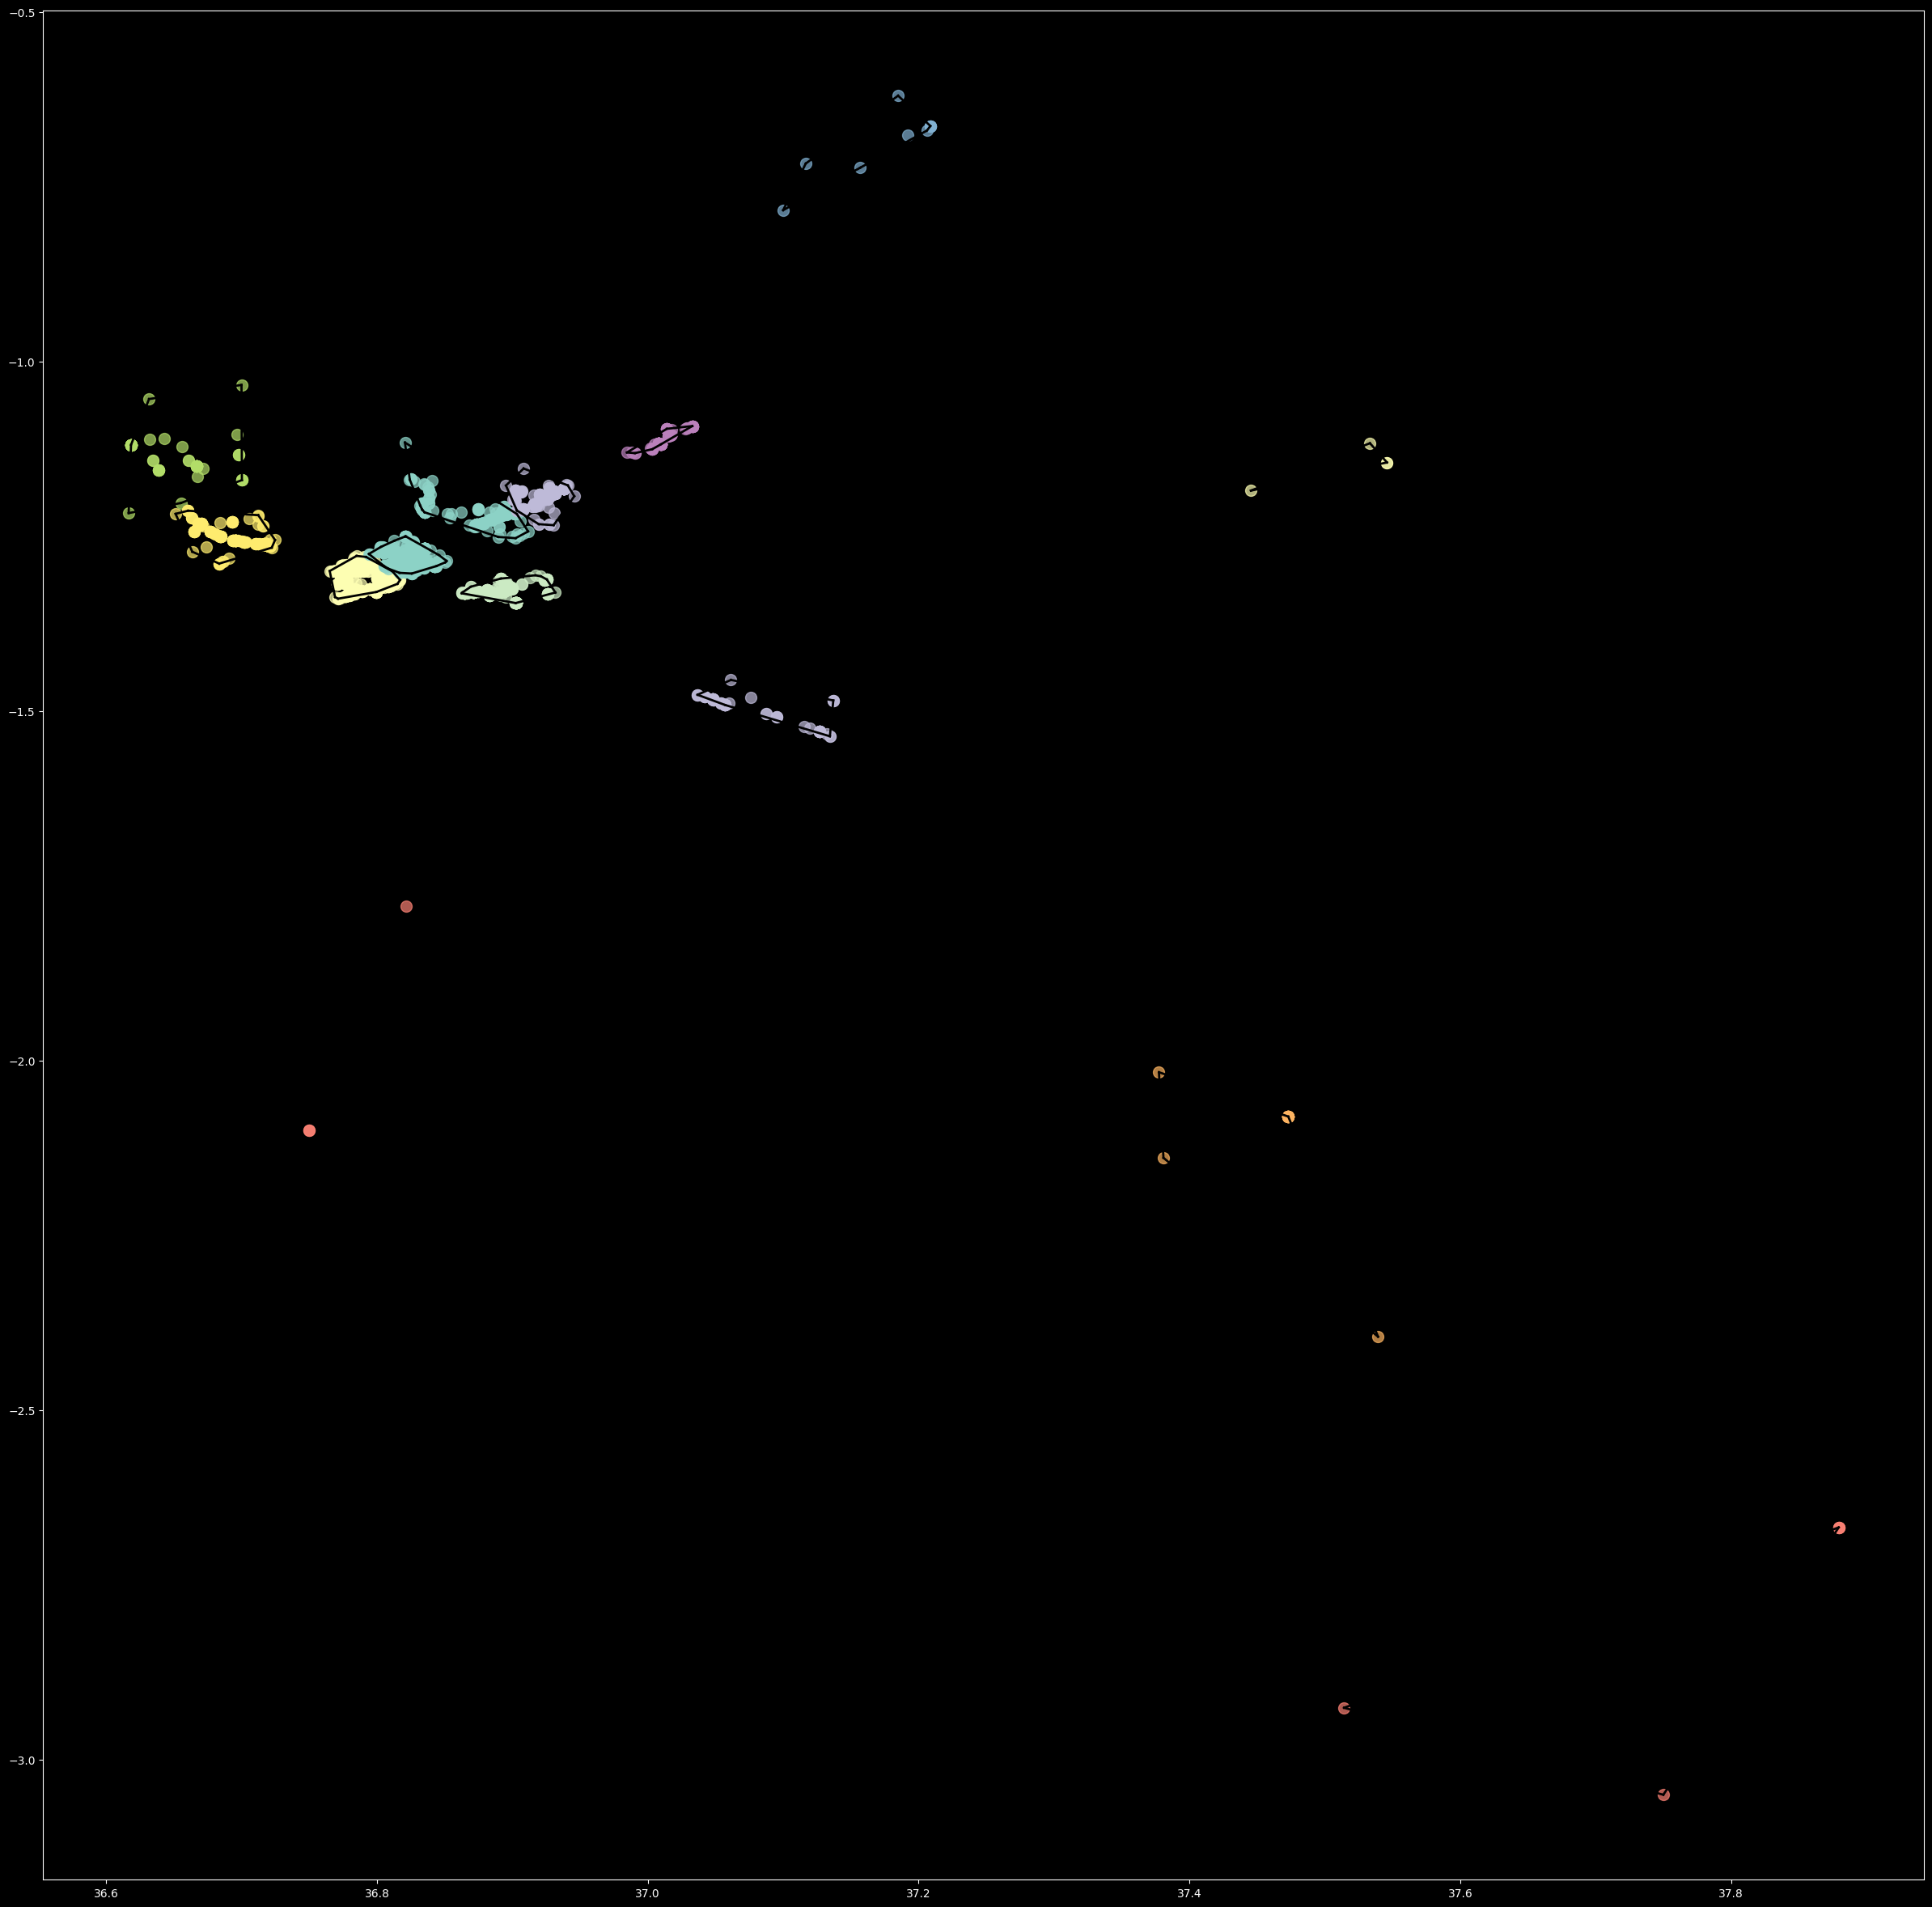

In [80]:
from scipy.spatial import ConvexHull
# Visualize the hierarchical clusters with scatter plot and convex hulls
plt.figure(figsize=(30, 30))

for cluster_label in set(clusters):
    cluster_points = X_train.loc[clusters == cluster_label]
    plt.scatter(
        cluster_points['longitude'],
        cluster_points['latitude'],
        label=f'Cluster {cluster_label + 1}',
        alpha=0.7,
        s=100  # Adjust the point size here
    )

    # Outline clusters with convex hulls
    hull = ConvexHull(cluster_points[['longitude', 'latitude']])
    for simplex in hull.simplices:
        plt.plot(cluster_points['longitude'].values[simplex], cluster_points['latitude'].values[simplex], 'k-', linewidth=2)

plt.title('Agglomerative Clustering with Neural Network Features')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()



In [81]:
cluster.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 35,
 'n_init': 'warn',
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

In [94]:
model.save('/home/roy/Documents/Final_Project/NaiRERS/nairers-ml')

INFO:tensorflow:Assets written to: /home/roy/Documents/Final_Project/NaiRERS/nairers-ml/assets


INFO:tensorflow:Assets written to: /home/roy/Documents/Final_Project/NaiRERS/nairers-ml/assets


In [95]:
import joblib
joblib.dump(cluster,'/home/roy/Documents/Final_Project/NaiRERS/nairers-ml/agg_model.pkl')

['/home/roy/Documents/Final_Project/NaiRERS/nairers-ml/agg_model.pkl']

In [ ]:
import tensorflow as tf
loaded_model = tf.keras.models.load_model("/home/roy/Documents/Final_Project/NaiRERS/nairers-ml/assets")

In [92]:
cluster.labels_

array([28, 16, 18, ..., 28, 10, 28], dtype=int32)